## Connectivity in high dimensions

Topological data analysis studies the topological properties of various structure and in particular of point clouds using persistent homology. 

The simplest homological information about a manifold is whether it is connected (the first Betti number for instance counts the number of connected components). 

However, we observe two stylized facts of high-dimensial point clouds regarding connectivity:
1. it is naturally harder to connect geometric random graphs in high dimensions,
2. the notion of nearest neighbours fades as the dimension grows.

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from connectivity_representation_learning import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Connectivity threshold in geometric random graphs as a function of dimension

A geometric random graph is a a graph formed by sampling $N$ points uniformly in the unit hypercude of $\mathbb{R}^d$ and adding an edge between each pair or points at distance no more than $\epsilon$.

[Penrose](https://projecteuclid.org/download/pdf_1/euclid.aop/1022677261) showed that the connectivity of the resulting graph depends on a threshold that scales like $(\frac{\log(N)}{N})^{\frac{1}{d}}$ : the probability of being connected tends to $1$ above this threshold, similar to a phase transition phenomenon.

For a given number of points, this threshold increases as a function of $d$, therefore it is $\textit{harder}$ to connect points in higher dimensions.

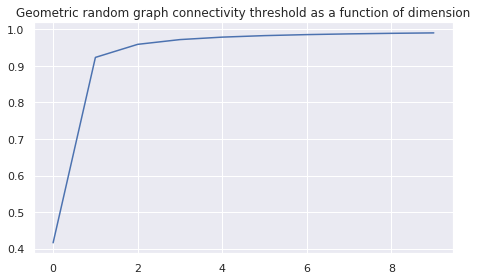

In [2]:
def eps_penrose(n,d):
    """The true Penrose threshold scales with a constant that depends on the L^p norm used.
    """
    return (np.log(n)/n) ** (1/d)

# dimensions
dims = range(5, 505, 50)
# number of points
N = 500

eps = [eps_penrose(N, d) for d in dims]

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)

ax.plot(eps)
ax.set_title('Geometric random graph connectivity threshold as a function of dimension')

plt.tight_layout()
plt.show()

### Persistence barcode lengths as a function of dimension

[Aggarwal et al.](https://bib.dbvis.de/uploadedFiles/155.pdf) showed that the usual norm-based metrics were less discriminative for high-dimensional point clouds. More precisely, the minimum distance in most random point clouds (e.g uniform in an hypercube) grows faster than the gap between the extreme distances, and their ratio tends to $0$. In practice, that means proximity query in higher dimensions is meaningless as the ranking between close and far away points becomes unstable (seen from a single point, all other points appear equally distant).

In [3]:
def generate_data(N, d):
    """Sample N points in the unit d-hypercube.
    """
    return np.array([np.random.rand(N) for _ in range(d)]).T

# number of simulations per dimension to smooth results
n_sim = 10
 
do_avg_dist = True

stats = np.empty((len(dims), 5))

for i, d in enumerate(dims):
    print(d)
    stats_sim = np.empty((n_sim, 5))
    for n in range(n_sim):
        data = generate_data(N, d)
        
        if do_avg_dist:
        # average distance between points in a d-dim uniform cloud 
        # increases with d, so renormalize the distance matrix to 
        # get more salient results.
            pdist = distance_matrix(data, data)
            avg_dists = np.sum(pdist)/(pdist.shape[0]*(pdist.shape[0]-1))
            data /= avg_dists
        
        stats_sim[n, :-2] = barcode_stats(data)
        stats_sim[n, -2] = (stats_sim[n, 2] - stats_sim[n, 0]) # absolute min-max gap
        stats_sim[n, -1] = (stats_sim[n, 2] - stats_sim[n, 0]) / stats_sim[n, 0] # relative min-max gap
    stats[i, :] = np.mean(stats_sim[:-1], axis=0)

5
55
105
155
205
255
305
355
405
455


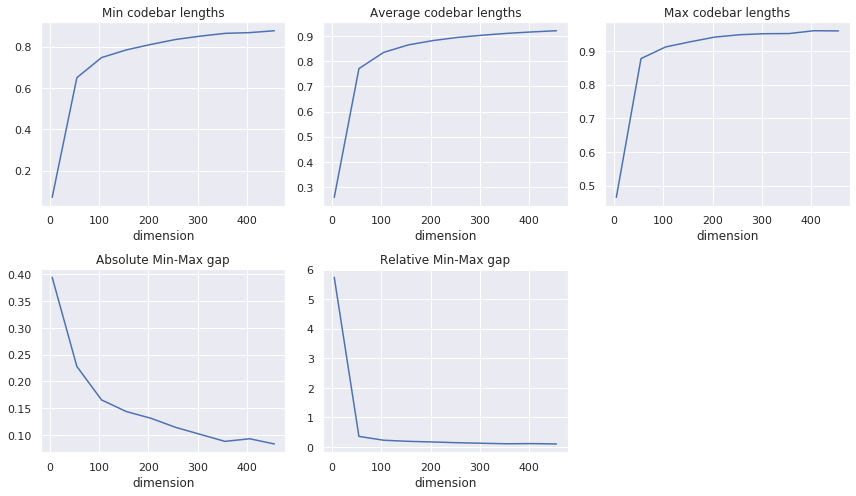

In [4]:
fig = plt.figure(figsize=(12, 7))

ax = fig.add_subplot(231)
ax.plot(dims, stats[:, 0])
ax.set_title('Min codebar lengths')
ax.set_xlabel('dimension')

ax = fig.add_subplot(232)
ax.plot(dims, stats[:, 1])
ax.set_title('Average codebar lengths')
ax.set_xlabel('dimension')

ax = fig.add_subplot(233)
ax.plot(dims, stats[:, 2])
ax.set_title('Max codebar lengths')
ax.set_xlabel('dimension')

ax = fig.add_subplot(234)
ax.plot(dims, stats[:, 3])
ax.set_title('Absolute Min-Max gap')
ax.set_xlabel('dimension')

ax = fig.add_subplot(235)
ax.plot(dims, stats[:, 4])
ax.set_title('Relative Min-Max gap')
ax.set_xlabel('dimension')

plt.tight_layout()
plt.show()

fig.savefig('barcode_dims.png', dpi=fig.dpi)